# Getting started

In [189]:
# Load libraries
import numpy as np
import matplotlib.pylab as py

## Generating data

In [190]:
# Generate data
number_of_points = 10
x = np.random.uniform(0, 1, size=number_of_points)

true_a = 1.0
true_b = 0.5

mu = 0.0
sigma = 0.1
noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

y = true_a*x + true_b + noise


Remember, our general model is

$$
y = f(x) + \epsilon
$$

In the case of linear models we have

$$
f(x) = a x + b
$$

So, our full data generating process is

$$
f(x) = a x + b + \epsilon
$$


In [191]:
print(x)
print(y)

[0.97650005 0.94164887 0.14876497 0.83943292 0.68198261 0.23554218
 0.58392234 0.13840797 0.7578664  0.93161849]
[1.53995068 1.39957436 0.56973653 1.43442718 1.2341125  0.79167845
 0.9199535  0.70808267 1.17658804 1.33562554]


## Our first plot

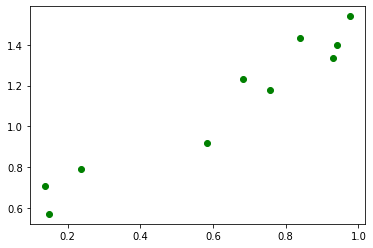

In [192]:
py.scatter(x, y, color='green')

## Which I have already messed up :-)

I don't want a dear friend getting mad at me...  So I need to label my axes!

![Rick Brown](https://www.wpi.edu/sites/default/files/faculty-image/drb_0.jpg?1641483676061)

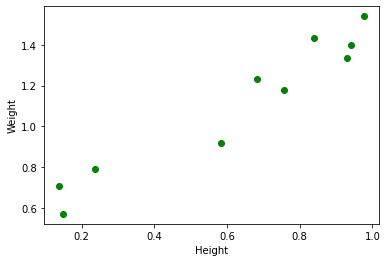

In [193]:
py.scatter(x, y, color='green')
py.xlabel('Height')
py.ylabel('Weight');

Oh, sorry, wrong class 😀

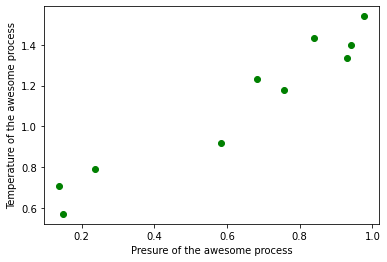

In [194]:
py.scatter(x, y, color='green')
py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

# Making a hypothesis  




Here we do some some **math**!  

There is a lot of magic 🧙 that happens here.  We will go into some of it as we go forward, but not too much 😀

In [195]:
deg = 1

# Lots of math magic in here!
z = np.polyfit(x, y, deg=deg)
y_hat_function = np.poly1d(z)


## I can now save lab time

In [196]:
# What I am really interested in.  I have never done this example and I 
# want to same time by not doing the experiment!
x_interested = 0.9
y_hat_interested = y_hat_function(x_interested)
print(f'For a pressure of {x_interested} I predict a temperature of {y_hat_interested}')


For a pressure of 0.9 I predict a temperature of 1.3820263596493676


## A nice plot... but am I done?

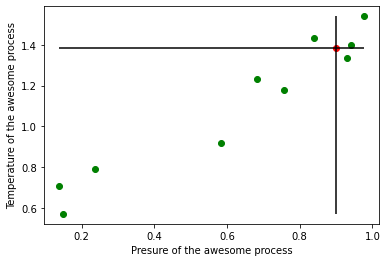

In [197]:
py.scatter(x, y, color='green')
py.hlines(y_hat_interested, xmin=min(x), xmax=max(x))
py.vlines(x_interested, ymin=np.min(y), ymax=max(y))
py.scatter(x_interested, y_hat_interested, color='red')
py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

## No! 
I don't know if I ***trust*** the answer.  Perhaps I actually need to do the experiment!?

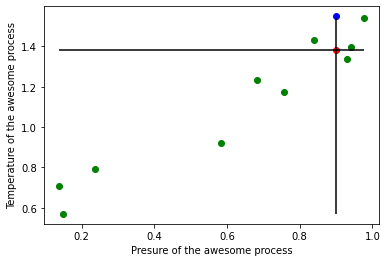

In [198]:
y_from_new_experiment = 1.55

py.scatter(x, y, color='green')
py.scatter(x_interested, y_hat_interested, color='red')
py.scatter(x_interested, y_from_new_experiment, color='blue')
py.hlines(y_hat_interested, xmin=min(x), xmax=max(x))
py.vlines(x_interested, ymin=np.min(y), ymax=max(y))
py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

# Training versus testing

![My happy face](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/SNice.svg/1024px-SNice.svg.png)

## Not all errors are created equal

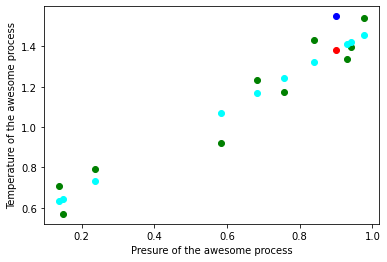

In [199]:
y_from_new_experiment = 1.55
y_training_predictions = y_hat_function(x)

py.scatter(x, y, color='green')
py.scatter(x, y_training_predictions, color='cyan')

py.scatter(x_interested, y_hat_interested, color='red')
py.scatter(x_interested, y_from_new_experiment, color='blue')

py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

## This is why we call this linear regression

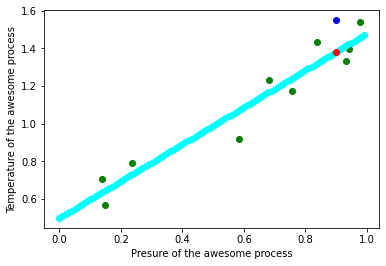

In [200]:
y_from_new_experiment = 1.55

#y_training_predictions = y_hat_function(x)
x_on_grid = np.arange(0,1,0.01)
y_predictions_on_grid = y_hat_function(x_on_grid)

py.scatter(x, y, color='green')
py.scatter(x_on_grid, y_predictions_on_grid, color='cyan')

py.scatter(x_interested, y_hat_interested, color='red')
py.scatter(x_interested, y_from_new_experiment, color='blue')

py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

# Better Python code

I am tired of typing so much, so let's make a function

In [201]:
def generate_data(number_of_points = 10, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.1):
  x = np.random.uniform(0, 1, size=number_of_points)

  true_a = 1.0
  true_b = 0.5

  mu = 0.0
  sigma = sigma
  noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

  y = true_a*x + true_b + noise
  return x,y

def create_model(x, y):
  deg = 1

  # Lots of math magic in here!
  z = np.polyfit(x, y, deg=deg)
  y_hat_function = np.poly1d(z)
  return y_hat_function

def evaluate_model(model, x_train, y_train, x_test, y_test):
  py.scatter(x_train, y_train, color='green')
  py.scatter(x_train, model(x_train), color='cyan')

  py.scatter(x_test, y_test, color='red')
  py.scatter(x_test, model(x_test), color='blue')

  py.xlabel('Presure of the awesome process')
  py.ylabel('Temperature of the awesome process');

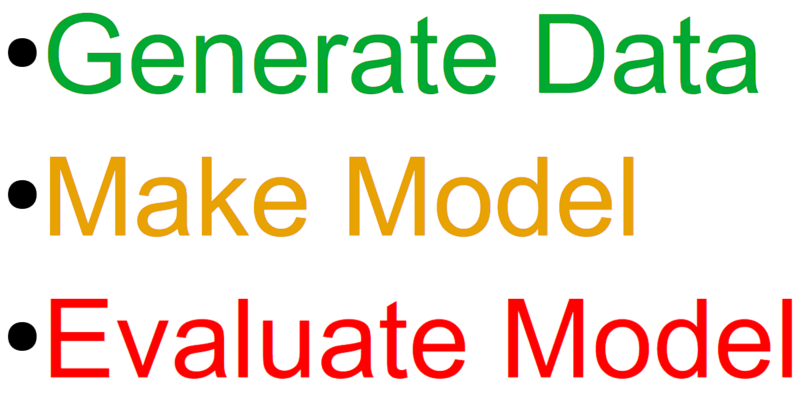

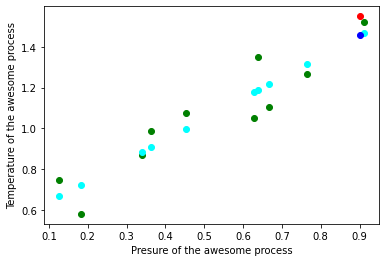

In [202]:
x_train, y_train = generate_data(number_of_points = 10, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.1)
model = create_model(x_train, y_train)
evaluate_model(model, x_train, y_train, x_test=[0.9], y_test=[1.55])

# Ok, hold on to your hats!

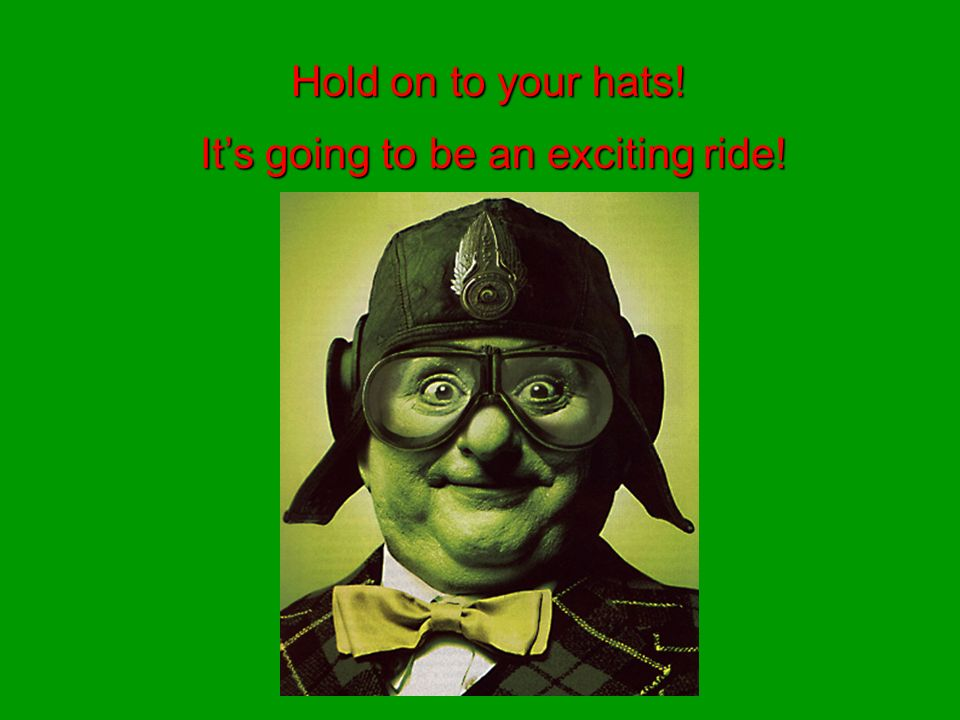

## Some *minor* but really **important** modifications to the code 🧙

In [203]:
def generate_data(number_of_points = 10, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.1, degree=1):
  x = np.random.uniform(-1, 1, size=number_of_points)

  true_a = 1.0
  true_b = 0.5

  mu = 0.0
  sigma = sigma
  noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

  y = true_a*x**degree + true_b + noise

  return x,y

def create_model(x, y, degree=1):
  # Lots of math magic in here!
  z = np.polyfit(x, y, deg=degree)
  y_hat_function = np.poly1d(z)
  return y_hat_function

def evaluate_model(model, x_train, y_train, x_test, y_test):
  py.scatter(x_train, y_train, color='green')
  py.scatter(x_train, model(x_train), color='cyan')

  py.scatter(x_test, y_test, color='red')
  py.scatter(x_test, model(x_test), color='blue')

  x_on_grid = np.arange(min([min(x_train), min(x_test)]), max([max(x_train), max(x_test)]), 0.01)
  y_predictions_on_grid = model(x_on_grid)

  py.plot(x_on_grid, y_predictions_on_grid)

  py.xlabel('Presure of the awesome process')
  py.ylabel('Temperature of the awesome process');

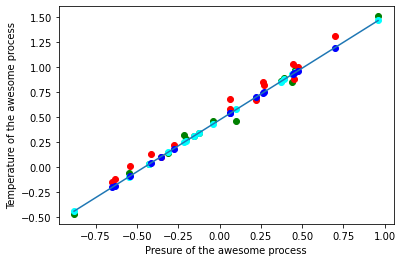

In [204]:
np.random.seed(123)
number_of_points = 30
x, y = generate_data(number_of_points = number_of_points, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.05, degree=1)

test_size = 15
x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=1)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

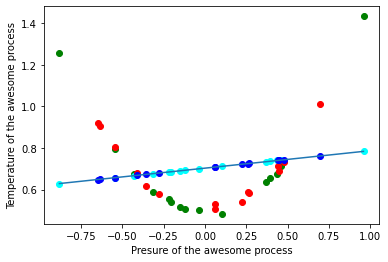

In [205]:
np.random.seed(123)
number_of_points = 30
x, y = generate_data(number_of_points = number_of_points, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.01, degree=2)

test_size = 15
x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=1)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

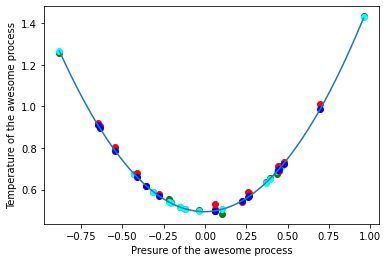

In [206]:
np.random.seed(123)
number_of_points = 30
x, y = generate_data(number_of_points = number_of_points, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.01, degree=2)

test_size = 15
x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=2)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

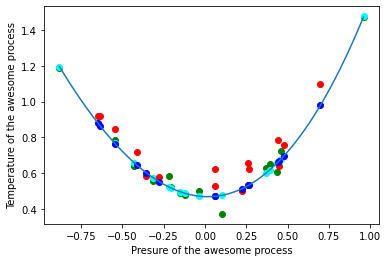

In [207]:
np.random.seed(123)
number_of_points = 30
x, y = generate_data(number_of_points = number_of_points, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.05, degree=2)

test_size = 15
x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=3)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

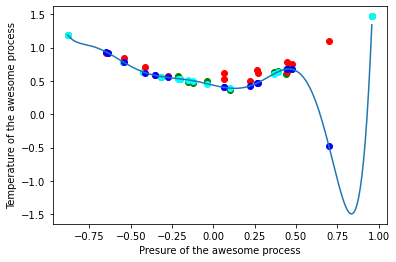

In [208]:
np.random.seed(123)
number_of_points = 30
x, y = generate_data(number_of_points = number_of_points, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.05, degree=2)

test_size = 15
x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=8)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

#  Other machine learning libraries and good things to know

## An overview

![map](https://miro.medium.com/max/1400/1*N3oBASDtXTgpGLJkeO9v8w.jpeg)

https://medium.com/@BlueOrangeDigital/essential-python-libraries-for-machine-learning-projects-d5cef004cf60

## Markdown:  Not a Python library, but how you make pretty notebooks

https://daringfireball.net/projects/markdown/

> Markdown is a text-to-HTML conversion tool for web writers. Markdown allows you to write using an easy-to-read, easy-to-write plain text format, then convert it to structurally valid XHTML (or HTML).

> Thus, “Markdown” is two things: (1) a plain text formatting syntax; and (2) a software tool, written in Perl, that converts the plain text formatting to HTML. See the Syntax page for details pertaining to Markdown’s formatting syntax. You can try it out, right now, using the online Dingus.

### Getting started

https://wordpress.com/support/markdown-quick-reference/

https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax

### Latex too!

https://ashki23.github.io/markdown-latex.html

## Numpy:  Making Python look like Matlab.   Matrices, vectors, and linear algebra, oh my!

> Using NumPy in Python gives functionality comparable to MATLAB since they are both interpreted,[20] and they both allow the user to write fast programs as long as most operations work on arrays or matrices instead of scalars.

https://numpy.org/doc/stable/index.html

https://numpy.org/doc/stable/user/quickstart.html

In [209]:
# Generate data
number_of_points = 10
x = np.random.uniform(0, 1, size=number_of_points)

true_a = 1.0
true_b = 0.5

mu = 0.0
sigma = 0.1
noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

y = true_a*x + true_b + noise

In [210]:
deg = 1

# Lots of math magic in here!
z = np.polyfit(x, y, deg=deg)
y_hat_function = np.poly1d(z)

## Matplotlib:  Plotting

> Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

> * Create publication quality plots.
* Make interactive figures that can zoom, pan, update.
* Customize visual style and layout.
* Export to many file formats .
* Embed in JupyterLab and Graphical  User Interfaces.
* Use a rich array of third-party packages built on Matplotlib.

https://matplotlib.org/stable/tutorials/introductory/usage.html

https://matplotlib.org/stable/tutorials/index

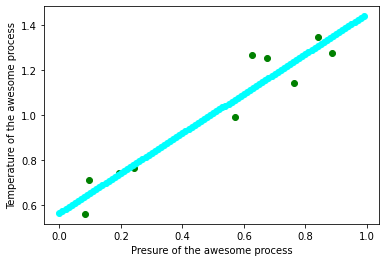

In [211]:
x_on_grid = np.arange(0,1,0.01)
y_predictions_on_grid = y_hat_function(x_on_grid)

py.scatter(x, y, color='green')
py.scatter(x_on_grid, y_predictions_on_grid, color='cyan')

py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

## Pandas:  A great place to store your data.  Think Excel spreadsheet, but in Python

https://pandas.pydata.org/docs/index.html

https://pandas.pydata.org/docs/getting_started/index.html

In [212]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [213]:
data = pd.DataFrame(data={'x':x, 'y':y})
data

,x,y
0,0.624904,1.266633
1,0.674689,1.255413
2,0.842342,1.346891
3,0.083195,0.559886
4,0.763683,1.143853
5,0.243666,0.763619
6,0.194223,0.741067
7,0.572457,0.989341
8,0.095713,0.711933
9,0.885327,1.275607


In [214]:
deg = 1

# Lots of math magic in here!
z = np.polyfit(data['x'], data['y'], deg=deg)
y_hat_function = np.poly1d(z)
data['y_hat'] = y_hat_function(data['x'])

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

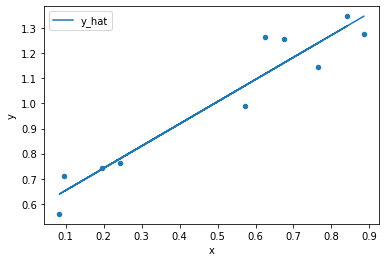

In [215]:
ax = data.plot(x='x',y='y', kind='scatter')
data.plot(x='x',y='y_hat', kind='line', ax=ax)


## Stasmodels:  All the math!

> statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at statsmodels.org.

https://www.statsmodels.org/stable/index.html

In [216]:
import statsmodels.formula.api as smf

In [217]:
results = smf.ols('y ~ x', data=data).fit()

What does all this mean?

In [218]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     86.11
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.48e-05
Time:                        16:02:41   Log-Likelihood:                 11.069
No. Observations:                  10   AIC:                            -18.14
Df Residuals:                       8   BIC:                            -17.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5656      0.055     10.246      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


## Seaborn:  Classic statistical analysis made easy

https://seaborn.pydata.org/

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

> For a brief introduction to the ideas behind the library, you can read the introductory notes or the paper. Visit the installation page to see how you can download the package and get started with it. You can browse the example gallery to see some of the things that you can do with seaborn, and then check out the tutorial or API reference to find out how.

In [219]:
import seaborn as sns

One command!

https://seaborn.pydata.org/tutorial/regression.html

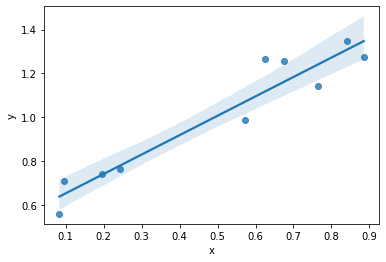

In [220]:
sns.regplot(x="x", y="y", data=data)

## Scikit Learn:  Machine Learning made easy.



> Simple and efficient tools for predictive data analysis
Accessible to everybody, and reusable in various contexts
Built on NumPy, SciPy, and matplotlib
Open source, commercially usable - BSD license

![map](https://scikit-learn.org/stable/_static/ml_map.png)

https://scikit-learn.org/stable/

https://scikit-learn.org/stable/auto_examples/index.html

In [221]:
# Generate data
number_of_points = 100
x = np.random.uniform(0, 1, size=number_of_points)

true_a = 1.0
true_b = 0.5

mu = 0.0
sigma = 0.1
noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

y = true_a*x + true_b + noise

In [222]:
from sklearn.linear_model import LinearRegression

# Make x into a 2D array
X = x.reshape(-1,1)
reg = LinearRegression().fit(X, y)


In [223]:
reg.coef_


array([1.00268433])

In [224]:
reg.intercept_


0.489391209888678

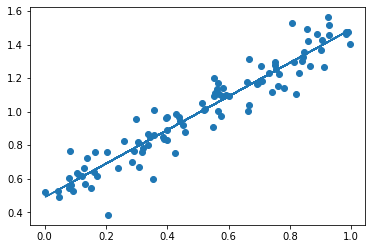

In [225]:
y_hat = reg.predict(X)
py.scatter(x,y)
py.plot(x,y_hat)

In [226]:
# Generate data
number_of_points = 100
x = np.random.uniform(0, 1, size=number_of_points)

true_a = 1.0
true_b = 0.5

mu = 0.0
sigma = 0.1
noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

y = true_a*x + true_b + noise

# Make x into a 2D array
X = x.reshape(-1,1)

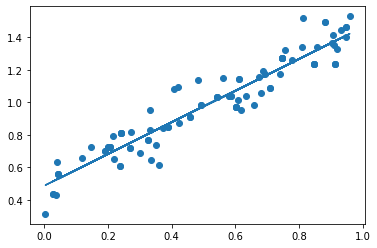

In [227]:
from sklearn.utils import resample

X_new, y_new = resample(X, y)
reg = LinearRegression().fit(X_new, y_new)
y_hat_new = reg.predict(X_new)
py.scatter(X_new[:,0],y_new)
py.plot(X_new[:,0],y_hat_new)

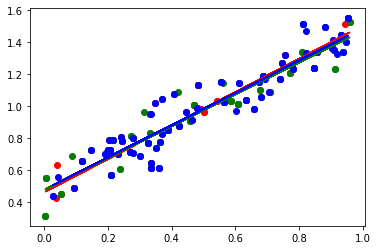

In [228]:
for c in ['r', 'g', 'b']:
  X_new, y_new = resample(X, y)
  reg = LinearRegression().fit(X_new, y_new)
  y_hat_new = reg.predict(X_new)
  py.scatter(X_new[:,0], y_new, color=c)
  py.plot(X_new[:,0], y_hat_new, color=c)

In [229]:
b0 =[]
b1 = []
for i in range(1000):
  X_new, y_new = resample(X, y)
  reg = LinearRegression().fit(X_new, y_new)
  b0 += [reg.intercept_]
  b1 += [reg.coef_[0]]

(array([  8.,  40., 108., 170., 236., 236., 115.,  64.,  17.,   6.]),
 array([0.42415717, 0.43671415, 0.44927112, 0.46182809, 0.47438506,
        0.48694204, 0.49949901, 0.51205598, 0.52461296, 0.53716993,
        0.5497269 ]),
 <a list of 10 Patch objects>)

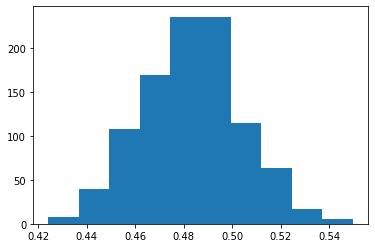

In [230]:
py.hist(b0)

(array([  2.,   8.,  49., 128., 234., 277., 183.,  94.,  21.,   4.]),
 array([0.88225576, 0.90520512, 0.92815447, 0.95110383, 0.97405319,
        0.99700255, 1.01995191, 1.04290126, 1.06585062, 1.08879998,
        1.11174934]),
 <a list of 10 Patch objects>)

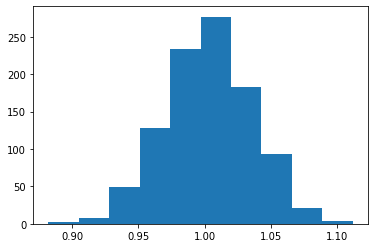

In [231]:
py.hist(b1)

In [232]:
data = pd.DataFrame({'x':x, 'y':y})
results = smf.ols('y ~ x', data=data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     825.6
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.55e-49
Time:                        16:02:43   Log-Likelihood:                 92.120
No. Observations:                 100   AIC:                            -180.2
Df Residuals:                      98   BIC:                            -175.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4830      0.020     24.256      0.0

In [233]:
print('std err b0: ', np.std(b0))
print('std err b1: ', np.std(b1))


std err b0:  0.020413393841892218
std err b1:  0.03289899162576265


## Pytorch:  A special bonus for those who want to do more advanced techniques

> PyTorch enables fast, flexible experimentation and efficient production through a user-friendly front-end, distributed training, and ecosystem of tools and libraries.

https://pytorch.org/

https://pytorch.org/tutorials/

https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

In [234]:
import torch
from torch.autograd import Variable


In [235]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [236]:
# Generate data
number_of_points = 100
x = np.random.uniform(0, 1, size=number_of_points)

true_a = 1.0
true_b = 0.5

mu = 0.0
sigma = 0.1
noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

y = true_a*x + true_b + noise

In [237]:
x_train = x.reshape(-1,1).astype(np.float32)
y_train = y.reshape(-1,1).astype(np.float32)

In [238]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 1000

In [239]:
model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [240]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [241]:
loss_list = []
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    loss_list += [loss.item()]

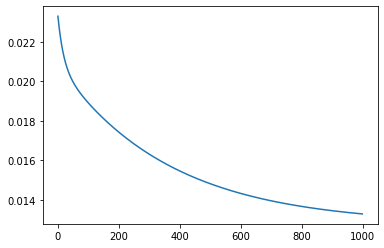

In [242]:
py.plot(loss_list)

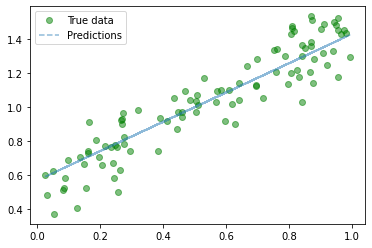

In [243]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()